## Classifying Newswires: Multiclass classification example

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.datasets import reuters

## Load Dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

C:\Users\chira\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\chira\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
len(train_data),len(test_data)

(8982, 2246)

In [4]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value,key) for (key,value) in word_index.items()])

In [5]:
' '.join([reverse_word_index.get(i-3,'?') for i in train_data[0]])

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## Vectorization

In [6]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences),dimension))
    for i,sequence in enumerate(sequences):
        results[i][sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [7]:
def to_one_hot(labels,dimension=46):
    results = np.zeros((len(labels),dimension))
    for i, label in enumerate(labels):
        results[i,label] = 1.
    return results
        
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [8]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [9]:
partial_y_train.shape

(7982, 46)

## Model

In [10]:
from tensorflow.keras import models
from tensorflow.keras import layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu',))
model.add(layers.Dense(46, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [13]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val,y_val)
                   )

Epoch 1/20
16/16 [==============================] - 2s 89ms/step - loss: 3.0429 - accuracy: 0.3869 - val_loss: 1.6582 - val_accuracy: 0.6450
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.4548 - accuracy: 0.7052 - val_loss: 1.2815 - val_accuracy: 0.7190
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0518 - accuracy: 0.7793 - val_loss: 1.1127 - val_accuracy: 0.7680
Epoch 4/20
16/16 [==============================] - 0s 17ms/step - loss: 0.8288 - accuracy: 0.8291 - val_loss: 1.0113 - val_accuracy: 0.7910
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.6802 - accuracy: 0.8585 - val_loss: 0.9804 - val_accuracy: 0.7940
Epoch 6/20
16/16 [==============================] - 0s 17ms/step - loss: 0.5316 - accuracy: 0.8889 - val_loss: 0.9199 - val_accuracy: 0.8100
Epoch 7/20
16/16 [==============================] - 0s 17ms/step - loss: 0.4276 - accuracy: 0.9091 - val_loss: 0.9184 - val_accuracy: 0.8070
Epoch 8/20
16

In [14]:
history_dict = history.history

In [15]:
import matplotlib.pyplot as plt

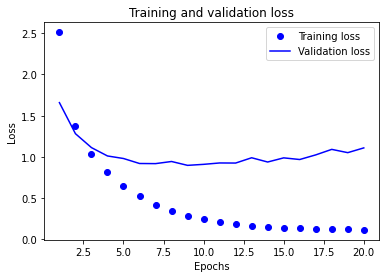

In [16]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

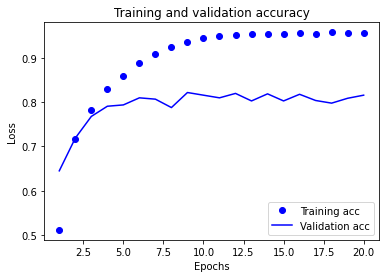

In [17]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Retraining Model from scratch

In [18]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512,
         )
results = model.evaluate(x_test,one_hot_test_labels)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 3.0418 - accuracy: 0.4493
Epoch 2/9
18/18 [==============================] - 0s 15ms/step - loss: 1.4131 - accuracy: 0.7135
Epoch 3/9
18/18 [==============================] - 0s 14ms/step - loss: 1.0144 - accuracy: 0.7897
Epoch 4/9
18/18 [==============================] - 0s 15ms/step - loss: 0.7905 - accuracy: 0.8311
Epoch 5/9
18/18 [==============================] - 0s 14ms/step - loss: 0.6302 - accuracy: 0.8683
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4861 - accuracy: 0.8998
Epoch 7/9
18/18 [==============================] - 0s 15ms/step - loss: 0.3981 - accuracy: 0.9170
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3304 - accuracy: 0.9288
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9443 - accuracy: 0.7974


## Random Baseline

In [19]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels)== np.array(test_labels_copy)
float(np.sum(hits_array))/len(test_labels)

0.18655387355298308

## Predicting new data

In [20]:
predictions = model.predict(x_test)

In [21]:
predictions[0].shape

(46,)

In [22]:
np.sum(predictions[0])

0.99999994

## Encoding labels as Integers

Categorical Encoding &#8594; categorical_crossentropy loss function

Encoding labels as integers &#8594; sparse_categorical_crossentropy loss function

In [23]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
         )
results = model.evaluate(x_test,y_test)

Epoch 1/9
18/18 [==============================] - 1s 16ms/step - loss: 3.2134 - accuracy: 0.3960
Epoch 2/9
18/18 [==============================] - 0s 16ms/step - loss: 1.4883 - accuracy: 0.7000
Epoch 3/9
18/18 [==============================] - 0s 15ms/step - loss: 1.0564 - accuracy: 0.7785
Epoch 4/9
18/18 [==============================] - 0s 14ms/step - loss: 0.8318 - accuracy: 0.8215
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 0.6448 - accuracy: 0.8673
Epoch 6/9
18/18 [==============================] - 0s 14ms/step - loss: 0.5069 - accuracy: 0.8975
Epoch 7/9
18/18 [==============================] - 0s 14ms/step - loss: 0.4100 - accuracy: 0.9147
Epoch 8/9
18/18 [==============================] - 0s 14ms/step - loss: 0.3458 - accuracy: 0.9295
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 0.9723 - accuracy: 0.7898


## Model with Information Bottleneck
Intermediate layers with fewer than the output category create an information bottleneck.

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy']
             )
model.fit(x_train,
          y_train,
          epochs=9,
          batch_size=512,
         )
results = model.evaluate(x_test,y_test)

Epoch 1/9
18/18 [==============================] - 1s 15ms/step - loss: 3.6947 - accuracy: 0.0317
Epoch 2/9
18/18 [==============================] - 0s 12ms/step - loss: 3.2148 - accuracy: 0.2421
Epoch 3/9
18/18 [==============================] - 0s 12ms/step - loss: 2.7875 - accuracy: 0.2678
Epoch 4/9
18/18 [==============================] - 0s 13ms/step - loss: 2.4597 - accuracy: 0.2717
Epoch 5/9
18/18 [==============================] - 0s 15ms/step - loss: 2.0983 - accuracy: 0.3630
Epoch 6/9
18/18 [==============================] - 0s 13ms/step - loss: 1.6965 - accuracy: 0.6741
Epoch 7/9
18/18 [==============================] - 0s 13ms/step - loss: 1.4058 - accuracy: 0.6970
Epoch 8/9
18/18 [==============================] - 0s 13ms/step - loss: 1.1864 - accuracy: 0.7294
Epoch 9/9
71/71 [==============================] - 0s 3ms/step - loss: 1.4235 - accuracy: 0.6785
